In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]


bird = 'B1083'

bird = 'B1056'
block_path = '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'

# 4 birds, 4 Bettis, all stim on one chart 
birds = ['B1083', 'B1075', 'B1235', 'B1056']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

#bin the data
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForBettiCurves'
segment_info = [0,0]
bdfs = {}

for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves/20170828T161341Z-10.0-5.0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves/20170828T161350Z-10.0-5.0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves/20170828T161356Z-10.0-5.0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves/20170825T211415Z-10.0-5.0.binned


In [ ]:
reload(tp2)
analysis_id = 'test2'
thresh = 6.0
nperms = None
ncellsperm = 20
dim = [0,1, 2,3,4]
Ntimes = 1000

windt = 10.0
dtovr = windt*0.5
stimlen = 6000 #ms
twin = np.linspace(0, stimlen, Ntimes)

(bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
#shuffle
(bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dim, twin, windt, dtovr, shuffle=True)

In [ ]:
pop_frs = su.get_population_firing_rate(bdf)

In [ ]:
betti=3
for stim in bc.keys():
    fig, ax1 = plt.subplots()
    fr = np.mean(pop_frs[stim], axis=1)
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    ax1.plot(t_ms/1000, avg[betti, :], 'r')
    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(fr))/(2*100), fr)
    plt.title(stim)
    #plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

In [ ]:
betti=2
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    plt.plot(t_ms/1000., avg[betti, :])
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')
    ax = plt.gca()
    axs[ind].plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    axs[ind].plot(t_ms/1000, ys, linewidth=2)
    ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))

In [ ]:
betti=1
for stim in bc.keys():
    dat = bcs[stim]
    avg = np.mean(dat, axis=2)
    plt.plot(t_ms/1000., avg[betti, :])
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

In [ ]:
betti=1
for stim in bc.keys():
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    plt.plot(t_ms/1000., avg[betti, :])
    plt.plot(t_ms/1000., avgs[betti, :])
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

In [ ]:

betti = 4
fig, axs = plt.subplots(4,4, figsize=(22,11), sharey=True)
axs = axs.flatten()
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    
    ax = axs[ind]
    ax.plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    ax.plot(t_ms/1000, ys, linewidth=2)
    ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    #if betti == 3:
    #    ax.set_ylim([-0.1, 4])
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170825/', '{}_P03S03_BettiCurveWithShuffled_betti{}.eps'.format(bird,betti)))

In [ ]:
stderr.shape

In [ ]:
betti=4
plt.figure(figsize=(22, 11))
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    plt.plot(t_ms/1000., y, linewidth=2.5)
    
    ax = plt.gca()
    ax.fill_between(t_ms/1000., y-s, y+s, alpha = 0.3)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170814/', '{}_P03S03_BettiCurvesAllStim_betti{}.eps'.format(bird, betti)))

In [ ]:
fig, axs = plt.subplots(2, 4, sharey=True, figsize=(22, 11))
bettis = [0,1,2,3]

axs = np.ravel(axs)
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    ax = axs[ind]
    for betti in bettis:
        y = avg[betti, :]
        ys = avgs[betti, :]
    
        s = stderr[betti, :]
        ss = stderrs[betti, :]
        ax.plot(t_ms/1000., y, linewidth=2.5)
        ax.fill_between(t_ms/1000., y-s, y+s, alpha = 0.3)
        ax.tick_params(labelsize=20)
        ax.set_xticks(range(7))
    #plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

In [ ]:

betti = 4
fig, axs = plt.subplots(8,4, figsize=(22,44), sharey=False)
axs = axs.flatten()
for betti in range(4):
    #print(betti)
    for ind, stim in enumerate(bc.keys()):
        print(stim)
        dat = bc[stim]
        dats = bcs[stim]
        avg = np.mean(dat, axis=2)
        avgs = np.mean(dats, axis=2)
    
        std = np.std(dat, axis=2)
        stds = np.std(dats, axis=2)
    
        stderr = std / np.sqrt(np.shape(dat)[2])
        stderrs = stds / np.sqrt(np.shape(dats)[2])
    
        y = avg[betti, :]
        ys = avgs[betti, :]
    
        s = stderr[betti, :]
        ss = stderrs[betti, :]

        ax = axs[8*betti + ind]

        ax.plot(t_ms/1000, y,linewidth=2)
        ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
        ax.plot(t_ms/1000, ys, linewidth=2)
        ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
        ax.tick_params(labelsize=20)
        ax.set_xticks(range(7))
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170825/', '{}_P03S03_BettiCurveWithShuffled_betti{}.eps'.format(bird,betti)))

# Comparison between full population and subsets

In [7]:
reload(tp2)

bird = 'B1056'
block_path = bps[bird]
bdf = bdfs[bird]

analysis_id = 'test2'
thresh = 6.0
nperms = None
ncellsperm = 0
dim = [0,1, 2,3,4]
Ntimes = 1000

windt = 10.0
dtovr = windt*0.5
stimlen = 6000 #ms
twin = np.linspace(0, stimlen, Ntimes)

(bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
#shuffle
(bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dim, twin, windt, dtovr, shuffle=True)


nperms = 30
ncellsperm = 30
(bc_perm, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
#shuffle
(bcs_perm, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dim, twin, windt, dtovr, shuffle=True)

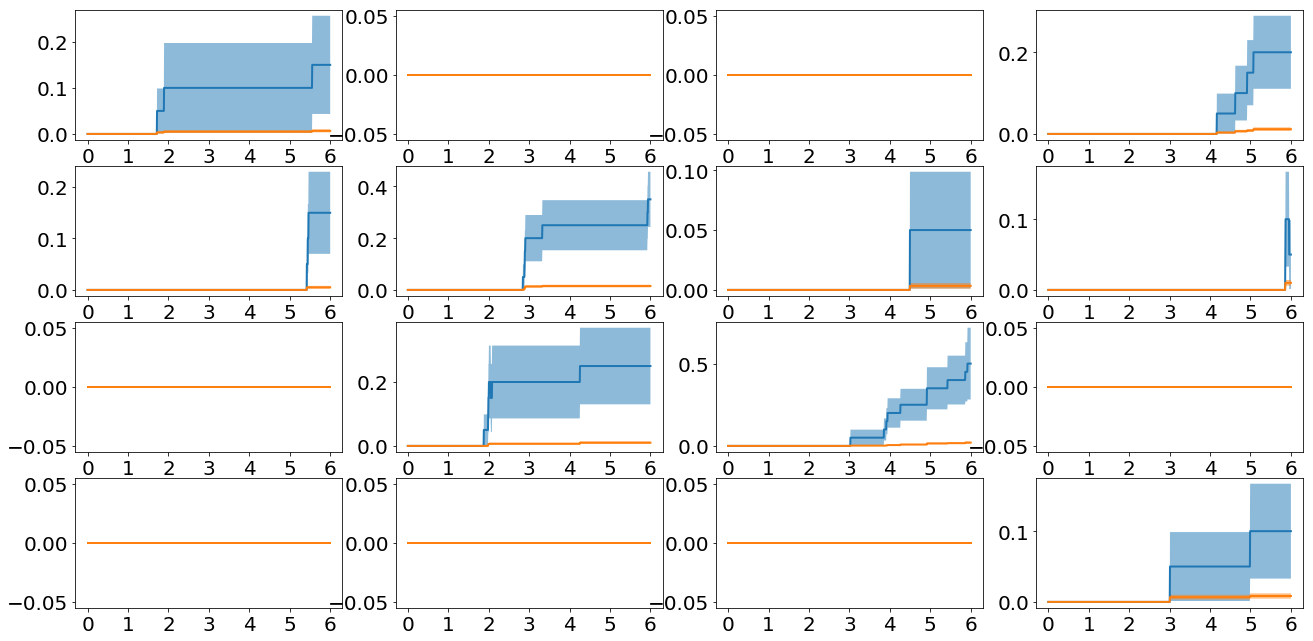

In [13]:

betti = 3
fig, axs = plt.subplots(4,4, figsize=(22,11), sharey=False)
axs = axs.flatten()
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bc_perm[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    
    ax = axs[ind]
    ax.plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    ax.plot(t_ms/1000, ys, linewidth=2)
    ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    #if betti == 3:
     #   ax.set_ylim([-0.1, 4])
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170828/', '{}_BettiCurveWithPermed{}-{}_betti{}.eps'.format(bird,ncellsperm, nperms,betti)))

In [ ]:
# 4 birds, 4 Bettis, all stim on one chart 
birds = ['B1083', 'B1075', 'B1235', 'B1056']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

#bin the data
winsize = 15.0
dtovr = winsize*0.5
comment = 'ForBettiCurves'
segment_info = [0,0]
bdfs = {}

for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf


In [ ]:
#compute bettis:
reload(tp2)
analysis_id = 'test2'
thresh = 6.0
nperms = None
ncellsperm = 20
dim = [0,1, 2,3]
Ntimes = 1000

windt = winsize
stimlen = 6000 #ms
twin = np.linspace(0, stimlen, Ntimes)
bcurves = {}

for bird in birds:
    block_path = bps[bird]
    bdf = bdfs[bird]
    (bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
    bcurves[bird] = bc

In [ ]:
fig, axs = plt.subplots(len(birds), len(dim), figsize=(22,22))
axs = axs.flatten()

for ind1, bird in enumerate(birds):
    bc = bcurves[bird]
    for ind2, betti in enumerate(dim):
        for ind, stim in enumerate(bc.keys()):
            dat = bc[stim]
            #dats = bc_perm[stim]
            avg = np.mean(dat, axis=2)
            #avgs = np.mean(dats, axis=2)
    
            std = np.std(dat, axis=2)
            #stds = np.std(dats, axis=2)
    
            stderr = std / np.sqrt(np.shape(dat)[2])
            #stderrs = stds / np.sqrt(np.shape(dats)[2])
    
            y = avg[betti, :]
            #ys = avgs[betti, :]
    
            s = stderr[betti, :]
            #ss = stderrs[betti, :]
    
            ax = axs[ind1*len(birds) + ind2]
            ax.plot(t_ms/1000, y,linewidth=2)
            ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
            #ax.plot(t_ms/1000, ys, linewidth=2)
            #ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
            ax.tick_params(labelsize=20)
            ax.set_xticks(range(7))
plt.savefig('/home/brad/AllBirdsAllBettisAllStim{}.eps'.format(winsize))